In [1]:
# %matplotlib
import cv2
from PIL import Image
import numpy as np
import json
import matplotlib.pyplot as plt
import os
import glob
import tqdm
IMAGE_PATH = "Picture"
SEGPATH = "Picture_segformer_1"

In [23]:
test_filename = "1625453344362.jpg"
test_img = cv2.imread(os.path.join(IMAGE_PATH, test_filename))
test_seg = cv2.imread(os.path.join(SEGPATH, test_filename))
# _, test_seg = cv2.threshold(test_seg,127,1,cv2.THRESH_BINARY)
# test_seg = cv2.medianBlur(test_seg, 3)
# test_seg = cv2.erode(test_seg, np.ones((15,15),np.uint8), iterations=9)
# test_seg = cv2.dilate(test_seg, np.ones((15,15),np.uint8), iterations=9)
edges = cv2.Canny(test_seg, 100, 200)
points = np.nonzero(edges.transpose(1,0))
print(test_seg.shape)
plt.axis("off")
plt.imshow(edges)
plt.show()
# 想检测一下角点，但尝试失败
# seg_gray = cv2.cvtColor(test_seg, cv2.COLOR_BGR2GRAY)
# seg_gray = test_seg
# seg_gray = np.float32(seg_gray)
# dst = cv2.cornerHarris(seg_gray, 2, 3, 0.04)
# dst = cv2.dilate(dst,None)
# print(np.sum(dst>=0.01*dst.max()))
# points = np.nonzero((dst>=0.01*dst.max()).transpose(1,0))


(480, 640, 3)


In [ ]:
from temp import removeDuplicateSimilar1, smooth
def process_points(points, dist_similar=1):
    ww, hh = points
    print(ww[:5])
    res = np.vstack((ww, hh)).transpose(1,0)
    print(res.shape)
    # res = smooth(res)
    res = removeDuplicateSimilar1(res, dist_similar)
    res = res.tolist()
    # res = [[ww[k], hh[k]] for k in range(len(hh))]
    # res.sort(key=lambda x: x[0])
    res.append([639, 479])
    res.append([0, 479])
    return res
temp = process_points(points, 20)
print(len(temp))
temp[0:3]
# temp

In [ ]:
json_label = {}
json_label["version"] = "4.5.9"
json_label["flags"] = {}
points_list = process_points(points, 50)
json_shape = {}
json_shape["label"] = "lane"
json_shape["points"] = points_list
json_shape["group_id"] = None
json_shape["shape_type"] = "polygon"
json_shape["flags"] = {}
json_label["shapes"] = [json_shape]
json_label["imagePath"] = "test.jpg"
json_label["imageData"] = None
json_label["imageHeight"] = test_seg.shape[0]
json_label["imageWidth"] = test_seg.shape[1]
jsonData = json.dumps(json_label, indent=4)
with open("test/test.json", "w") as f:
    f.write(jsonData)

(480, 640, 3)
(480, 640, 3)


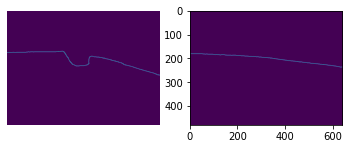

In [11]:
from temp import myUnique, removeDuplicateSimilar1
test_filename_1 = "1625453344362.jpg"
test_img_1 = cv2.imread(os.path.join(IMAGE_PATH, test_filename_1))
test_seg_1 = cv2.imread(os.path.join(SEGPATH, test_filename_1))
# _, test_seg = cv2.threshold(test_seg,127,1,cv2.THRESH_BINARY)
# test_seg = cv2.medianBlur(test_seg, 3)
# test_seg = cv2.erode(test_seg, np.ones((15,15),np.uint8), iterations=9)
# test_seg = cv2.dilate(test_seg, np.ones((15,15),np.uint8), iterations=9)
edges_1 = cv2.Canny(test_seg_1, 100, 200)
points_1 = np.nonzero(edges_1.transpose(1,0))
print(test_seg_1.shape)
plt.axis("off")
plt.subplot(121)
plt.imshow(edges_1)
ww_1, hh_1 = points_1
res_1 = np.vstack((ww_1, hh_1)).transpose(1,0)
_, ic_1 = myUnique(res_1[:, 0], return_inverse=True, axis=0)
del_flag_1 = np.append(np.array([1]), np.diff(ic_1))  # 不删除队列第一个元素
del_index_1 = np.argwhere(del_flag_1 == 0)
res_1 = np.delete(res_1, del_index_1, axis=0)
res_1 = removeDuplicateSimilar1(res_1, 20)

test_filename_2 = "1625453450122.jpg"
test_img_2 = cv2.imread(os.path.join(IMAGE_PATH, test_filename_2))
test_seg_2 = cv2.imread(os.path.join(SEGPATH, test_filename_2))
edges_2 = cv2.Canny(test_seg_2, 100, 200)
points_2 = np.nonzero(edges_2.transpose(1,0))
print(test_seg_2.shape)
plt.axis("off")
plt.subplot(122)
plt.imshow(edges_2)
ww_2, hh_2 = points_2
res_2 = np.vstack((ww_2, hh_2)).transpose(1,0)
_, ic_2 = myUnique(res_2[:, 0], return_inverse=True, axis=0)
del_flag_2 = np.append(np.array([1]), np.diff(ic_2))  # 不删除队列第一个元素
del_index_2 = np.argwhere(del_flag_2 == 0)
res_2 = np.delete(res_2, del_index_2, axis=0)
res_2 = removeDuplicateSimilar1(res_2, 20)

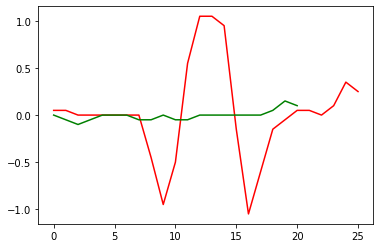

(26,)


In [13]:
from temp import getYawAim, getCurve
tangentAngle_1 = getYawAim(res_1)
curveArr_1 = getCurve(res_1, tangentAngle_1)
tangentAngle_2 = getYawAim(res_2)
curveArr_2 = getCurve(res_2, tangentAngle_2)
plt.plot(curveArr_1, "r")
plt.plot(curveArr_2, "g")
plt.show()
print(curveArr_1.shape)

In [26]:
img = test_img.copy()
pts = res.reshape((-1,1,2))
img = cv2.polylines(img, [pts], False, (0,255,255), 5)
plt.imshow(img)